# Assignment #1 : Performance Benchmarking of Cryptographic Mechanisms

### A. Generate random text files with the following sizes 
        • For AES (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152
        • For SHA (in bytes): 8, 64, 512, 4096, 32768, 262144, 2097152
        • For RSA (in bytes): 2, 4, 8, 16, 32, 64, 128

In [7]:
import os
import random
import string

# Generates a .txt file given a specified size
def generate_random_txt_file(filename, size):
    with open(filename, "w") as f:
        f.write(''.join(random.choices(string.ascii_letters + string.digits, k=size)))

# Size of the files in bytes for AES, SHA and RSA
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]  
sizes_sha = [8, 64, 512, 4096, 32768, 262144, 2097152]  
sizes_rsa = [2, 4, 8, 16, 32, 64, 128]  

os.makedirs("random_text_files", exist_ok=True)

# Generate files for AES, SHA and RSA
for size in sizes_aes:
    generate_random_txt_file(f"random_text_files/aes_{size}.txt", size)

for size in sizes_sha:
    generate_random_txt_file(f"random_text_files/sha_{size}.txt", size)

for size in sizes_rsa:
    generate_random_txt_file(f"random_text_files/rsa_{size}.txt", size)

When this script is executed, it generates random text files of sizes previously mentioned in the exercise, inside a folder named "random_text_files". The script ensures the directory exists before creating the files.

### B. Encrypt and decrypt all these files using AES. Employ a key of 256 bits. Measure the time it takes to encrypt and decrypt each of the files. To do this, you might want to use the python module timeit. Make sure to produce statistically significant results.

Size: 8 bytes - Encryption: 0.000111s - Decryption: 0.000076s
Size: 64 bytes - Encryption: 0.000146s - Decryption: 0.000074s
Size: 512 bytes - Encryption: 0.000051s - Decryption: 0.000037s
Size: 4096 bytes - Encryption: 0.000050s - Decryption: 0.000079s
Size: 32768 bytes - Encryption: 0.000189s - Decryption: 0.000086s
Size: 262144 bytes - Encryption: 0.000584s - Decryption: 0.000456s
Size: 2097152 bytes - Encryption: 0.004353s - Decryption: 0.005004s




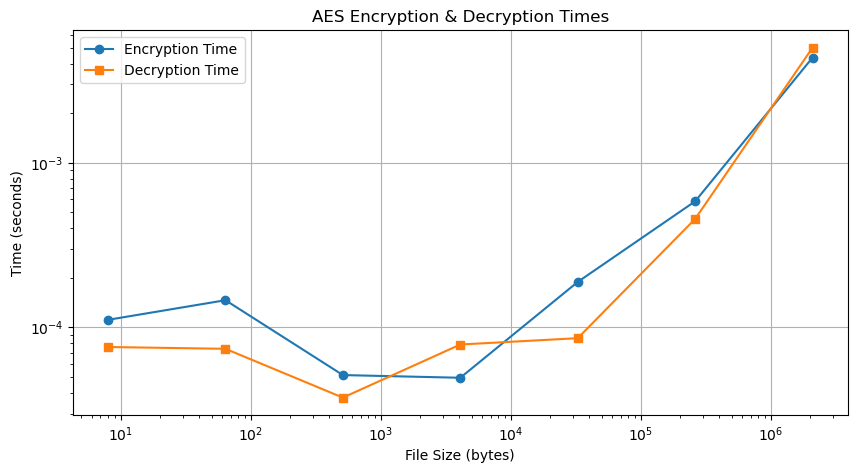

In [49]:
import os
import timeit
import numpy as np
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import padding

# AES encryption function
def encrypt_aes(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.encryptor().update(data) + cipher.encryptor().finalize()

# AES decryption function
def decrypt_aes(encrypted_data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.decryptor().update(encrypted_data) + cipher.decryptor().finalize()

# File sizes to test
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
encryption_times, decryption_times = [], []

# Generate AES key (256 bits) and IV (128 bits)
key, iv = os.urandom(32), os.urandom(16)

for size in sizes_aes:
    filename = f"random_text_files/aes_{size}.txt"
    with open(filename, "rb") as f:
        data = f.read()
    
    # Measure encryption time
    enc_time = timeit.timeit(lambda: encrypt_aes(data, key, iv), number=1)
    encryption_times.append(enc_time)
    encrypted_data = encrypt_aes(data, key, iv)
    
    # Measure decryption time
    dec_time = timeit.timeit(lambda: decrypt_aes(encrypted_data, key, iv), number=1)
    decryption_times.append(dec_time)
    print(f"Size: {size} bytes - Encryption: {enc_time:.6f}s - Decryption: {dec_time:.6f}s")

# Plot results
print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_aes, encryption_times, marker='o', label='Encryption Time')
plt.plot(sizes_aes, decryption_times, marker='s', label='Decryption Time')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("File Size (bytes)")
plt.ylabel("Time (seconds)")
plt.title("AES Encryption & Decryption Times")
plt.legend()
plt.grid(True)
plt.show()

After using AES to encrypt and decrypt the file sizes **one time**, the plot generated above shows that the results do not exhibit a clear pattern. This can be due to the variability in system performance or other factors affecting each single execution. 

### Do results change if you run a fixed algorithm over the same file multiple times?

Size: 8 bytes - Encryption: 0.000032s - Decryption: 0.000030s
Size: 64 bytes - Encryption: 0.000024s - Decryption: 0.000020s
Size: 512 bytes - Encryption: 0.000027s - Decryption: 0.000028s
Size: 4096 bytes - Encryption: 0.000026s - Decryption: 0.000025s
Size: 32768 bytes - Encryption: 0.000067s - Decryption: 0.000064s
Size: 262144 bytes - Encryption: 0.000389s - Decryption: 0.000366s
Size: 2097152 bytes - Encryption: 0.004237s - Decryption: 0.004397s




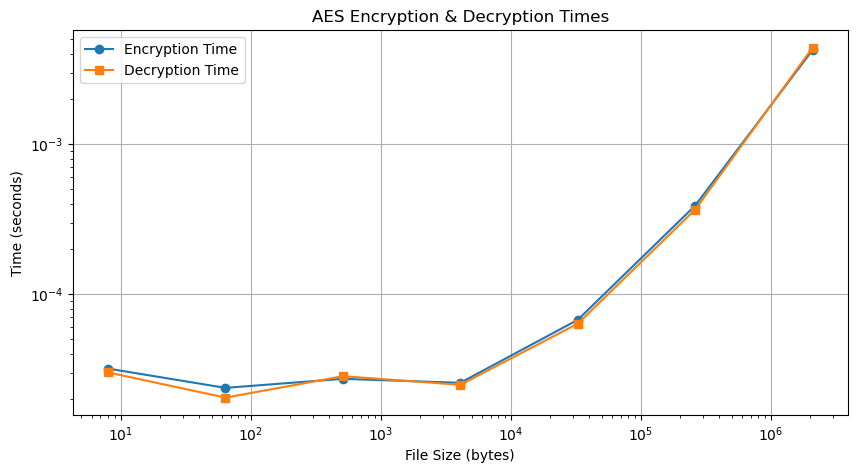

In [52]:
import os
import timeit
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

# AES encryption function
def encrypt_aes(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.encryptor().update(data) + cipher.encryptor().finalize()

# AES decryption function
def decrypt_aes(encrypted_data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.decryptor().update(encrypted_data) + cipher.decryptor().finalize()

# File sizes to test
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
encryption_times, decryption_times = [], []

# Generate AES key (256 bits) and IV (128 bits)
key, iv = os.urandom(32), os.urandom(16)

for size in sizes_aes:
    data = os.urandom(size)  # Generate random data instead of reading files
    iterations = 1000 if size <= 4096 else 100
    
    enc_time = timeit.timeit(lambda: encrypt_aes(data, key, iv), number=iterations) / iterations
    encryption_times.append(enc_time)
    encrypted_data = encrypt_aes(data, key, iv)
    
    dec_time = timeit.timeit(lambda: decrypt_aes(encrypted_data, key, iv), number=iterations) / iterations
    decryption_times.append(dec_time)
    
    print(f"Size: {size} bytes - Encryption: {enc_time:.6f}s - Decryption: {dec_time:.6f}s")

# Plot results
print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_aes, encryption_times, marker='o', label='Encryption Time')
plt.plot(sizes_aes, decryption_times, marker='s', label='Decryption Time')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("File Size (bytes)")
plt.ylabel("Time (seconds)")
plt.title("AES Encryption & Decryption Times")
plt.legend()
plt.grid(True)
plt.show()


The program encrypts and decrypts files of different sizes using AES-256 in CBC mode, measuring execution times. A random 256-bit key and 128-bit IV are used for security. Smaller files (≤ 4096 bytes) are processed 1000 times, while larger ones are run 100 times for statistical significance.

**Encryption and decryption times are similar because AES operates symmetrically**, with both processes involving nearly identical steps. 

Running the algorithm multiple times on the same file reveals a consistent pattern. The log-log plot shows that execution time scales proportionally with file size, confirming AES's predictable performance behavior.


### And what if you run an algorithm over multiple randomly generated files of fixed size?


Size: 8 bytes - Avg Encryption: 0.000066s - Avg Decryption: 0.000049s
Size: 64 bytes - Avg Encryption: 0.000047s - Avg Decryption: 0.000050s
Size: 512 bytes - Avg Encryption: 0.000050s - Avg Decryption: 0.000049s
Size: 4096 bytes - Avg Encryption: 0.000068s - Avg Decryption: 0.000051s
Size: 32768 bytes - Avg Encryption: 0.000160s - Avg Decryption: 0.000196s
Size: 262144 bytes - Avg Encryption: 0.000771s - Avg Decryption: 0.000671s
Size: 2097152 bytes - Avg Encryption: 0.004971s - Avg Decryption: 0.004924s




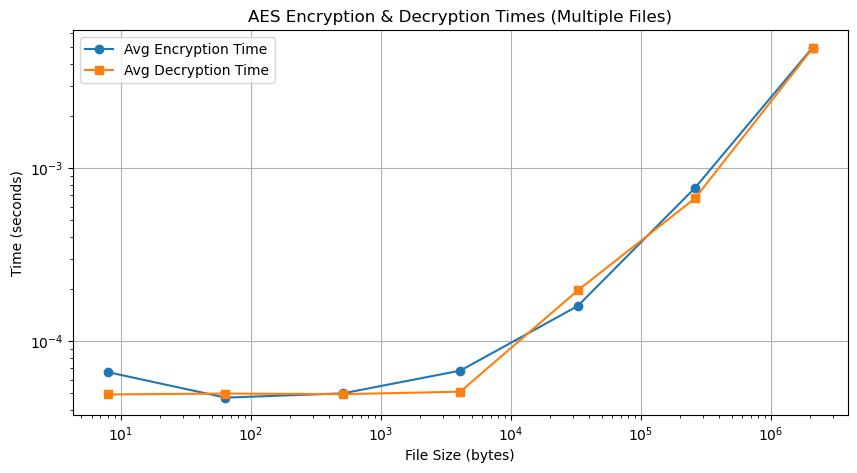

In [62]:
import os
import timeit
import matplotlib.pyplot as plt
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend

# AES encryption function
def encrypt_aes(data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.encryptor().update(data) + cipher.encryptor().finalize()

# AES decryption function
def decrypt_aes(encrypted_data, key, iv):
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    return cipher.decryptor().update(encrypted_data) + cipher.decryptor().finalize()

# File sizes and number of files to test
sizes_aes = [8, 64, 512, 4096, 32768, 262144, 2097152]
num_files_per_size = 10  # Number of random files to generate per size

encryption_times, decryption_times = [], []

# Generate AES key (256 bits)
key = os.urandom(32)

for size in sizes_aes:
    enc_times, dec_times = [], []

    for _ in range(num_files_per_size):
        data = os.urandom(size)  # Generate a new random file (data)
        iv = os.urandom(16)  # Generate a new IV for each encryption
        
        # Measure encryption time
        enc_time = timeit.timeit(lambda: encrypt_aes(data, key, iv), number=1)
        enc_times.append(enc_time)

        encrypted_data = encrypt_aes(data, key, iv)

        # Measure decryption time
        dec_time = timeit.timeit(lambda: decrypt_aes(encrypted_data, key, iv), number=1)
        dec_times.append(dec_time)

    # Compute the average time for this file size
    avg_enc_time = sum(enc_times) / num_files_per_size
    avg_dec_time = sum(dec_times) / num_files_per_size

    encryption_times.append(avg_enc_time)
    decryption_times.append(avg_dec_time)

    print(f"Size: {size} bytes - Avg Encryption: {avg_enc_time:.6f}s - Avg Decryption: {avg_dec_time:.6f}s")

# Plot results
print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_aes, encryption_times, marker='o', label='Avg Encryption Time')
plt.plot(sizes_aes, decryption_times, marker='s', label='Avg Decryption Time')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("File Size (bytes)")
plt.ylabel("Time (seconds)")
plt.title("AES Encryption & Decryption Times (Multiple Files)")
plt.legend()
plt.grid(True)
plt.show()

When the algorithm is run on multiple randomly generated files of the same size, some variations in execution times can be observed. These differences arise from the distinct data patterns, which can affect the efficiency of the encryption and decryption operations.

#### In conclusion, running the algorithm AES over the same file multiple times can have more stable results and it can be useful for benchmarking in a controlled input. However, running AES over multiple randomly generated files can capture the variations in performance and it avoids artificial optimizations like caching. It requires more data processing and the results may be noisier.

### C. Using the python module for RSA encryption and decryption, measure the time of RSA encryption and decryption for the file sizes listed in part A, with key of size 2048 bits (minimum recommended for RSA).

Size: 2 bytes - Encryption: 0.000040s - Decryption: 0.000537s
Size: 4 bytes - Encryption: 0.000039s - Decryption: 0.000537s
Size: 8 bytes - Encryption: 0.000037s - Decryption: 0.000559s
Size: 16 bytes - Encryption: 0.000041s - Decryption: 0.000523s
Size: 32 bytes - Encryption: 0.000035s - Decryption: 0.000515s
Size: 64 bytes - Encryption: 0.000035s - Decryption: 0.000509s
Size: 128 bytes - Encryption: 0.000036s - Decryption: 0.000519s




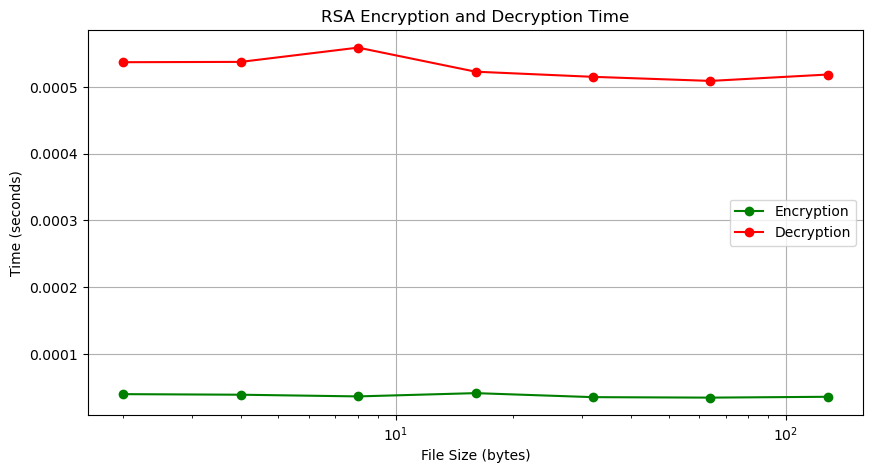

In [47]:
import os
import timeit
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import hashes

# Generate 2048-bit RSA key pair
private_key = rsa.generate_private_key(public_exponent=65537, key_size=2048)
public_key = private_key.public_key()

# File sizes to test (in bytes)
sizes_rsa = [2, 4, 8, 16, 32, 64, 128]

# Initialize time storage
encryption_times = []
decryption_times = []

for size in sizes_rsa:
    data = os.urandom(size)  # Generate random data
    iterations = 1000 if size <= 16 else 100  # Set iterations based on size
    
    # Measure encryption time
    enc_time = timeit.timeit(lambda: public_key.encrypt(
        data,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    ), number=iterations) / iterations
    encryption_times.append(enc_time)
    
    # Encrypt data once for decryption timing
    encrypted_data = public_key.encrypt(
        data,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    
    # Measure decryption time
    dec_time = timeit.timeit(lambda: private_key.decrypt(
        encrypted_data,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    ), number=iterations) / iterations
    decryption_times.append(dec_time)
    
    print(f"Size: {size} bytes - Encryption: {enc_time:.6f}s - Decryption: {dec_time:.6f}s")

print("\n")
plt.figure(figsize=(10, 5))
plt.plot(sizes_rsa, encryption_times, marker='o', color= 'green', label='Encryption')
plt.plot(sizes_rsa, decryption_times, marker='o', color='red', label='Decryption')
plt.xscale('log')
plt.xlabel('File Size (bytes)')
plt.ylabel('Time (seconds)')
plt.title('RSA Encryption and Decryption Time')
plt.legend()
plt.grid(True)
plt.show()